In [2]:
import pandas as pd
from pathlib import Path
from glob import glob
import numpy as np
from datetime import datetime,timedelta
from tqdm.notebook import tqdm


Import and sort all caravela apogee_SL510 eurec4a files, creating a dataframe from this:

In [2]:
files_list = glob(r'E:\Eurec4a_master\Caravela\apogee_SL_510\*\*'+ '/*SL_510*')  
files_list.sort()

li = []

for filename in tqdm(files_list):
    df = pd.read_csv(filename, header=0, sep=',',index_col=False)
    li.append(df)

sl = pd.concat(li, axis=0)

In [3]:
sl

,PC Timestamp[UTC],PC Time Zone,SL-510-SS[W m-2]
0,2020/01/15 12:07:08.677,00:00:00,411.395
1,2020/01/15 12:07:09.686,00:00:00,410.774
2,2020/01/15 12:07:10.693,00:00:00,410.632
3,2020/01/15 12:07:11.700,00:00:00,410.632
4,2020/01/15 12:07:12.711,00:00:00,410.926
...,...,...,...
1199,2020/02/24 14:20:06.678,00:00:00,436.089
1200,2020/02/24 14:20:07.686,00:00:00,435.655
1201,2020/02/24 14:20:08.688,00:00:00,439.407
1202,2020/02/24 14:20:09.688,00:00:00,439.124


Parse the timestamp to a datetime format

In [4]:
dt = []
for i in tqdm(sl['PC Timestamp[UTC]']):
    dt.append(datetime.strptime(i, '%Y/%m/%d %H:%M:%S.%f'))
sl['dt [UTC]'] = dt

In [5]:
sl = sl[(sl['dt [UTC]'] >= '2020-01-22 00:00:00.000')] #select data from Caravela's launch onwards
sl

,PC Timestamp[UTC],PC Time Zone,SL-510-SS[W m-2],dt [UTC]
0,2020/01/22 17:20:06.798,00:00:00,447.736,2020-01-22 17:20:06.798
1,2020/01/22 17:20:07.795,00:00:00,447.887,2020-01-22 17:20:07.795
2,2020/01/22 17:20:08.801,00:00:00,447.452,2020-01-22 17:20:08.801
3,2020/01/22 17:20:09.809,00:00:00,447.310,2020-01-22 17:20:09.809
4,2020/01/22 17:20:10.816,00:00:00,447.970,2020-01-22 17:20:10.816
...,...,...,...,...
1199,2020/02/24 14:20:06.678,00:00:00,436.089,2020-02-24 14:20:06.678
1200,2020/02/24 14:20:07.686,00:00:00,435.655,2020-02-24 14:20:07.686
1201,2020/02/24 14:20:08.688,00:00:00,439.407,2020-02-24 14:20:08.688
1202,2020/02/24 14:20:09.688,00:00:00,439.124,2020-02-24 14:20:09.688


Tidy this up to drop the columns we dont need

In [6]:
sl = sl.reset_index()
sl = sl.drop(['index','PC Time Zone','PC Timestamp[UTC]' ],axis=1)

check for any gaps in timeseries larger than 2 seconds

In [8]:
time_diff = sl['dt [UTC]'].values[1:] - sl['dt [UTC]'].values[:-1]
for i in np.arange(1, len(time_diff)):
    if np.timedelta64(3599, 's') >= time_diff[i] > np.timedelta64(2, 's'):
        print('gap starts at', sl['dt [UTC]'][i], 'and lasts for', 
              np.timedelta64(time_diff[i],'s'))
    if time_diff[i] > np.timedelta64(3599, 's'):
        print('gap starts at', sl['dt [UTC]'][i], 'and lasts for', 
              np.timedelta64(time_diff[i],'s'), ' - approximately', np.timedelta64(time_diff[i],'h'))

gap starts at 2020-01-22 20:35:34.193000 and lasts for 21092 seconds  - approximately 5 hours
gap starts at 2020-01-27 12:49:42.753000 and lasts for 91447 seconds  - approximately 25 hours
gap starts at 2020-01-29 17:47:36.976000 and lasts for 20 seconds
gap starts at 2020-01-31 18:08:06.895000 and lasts for 14 seconds
gap starts at 2020-02-01 15:29:12.123000 and lasts for 2 seconds
gap starts at 2020-02-04 10:53:07.094000 and lasts for 15 seconds
gap starts at 2020-02-07 08:06:33.486000 and lasts for 2 seconds
gap starts at 2020-02-09 21:46:59.899000 and lasts for 3 seconds
gap starts at 2020-02-13 11:54:22.136000 and lasts for 2 seconds
gap starts at 2020-02-14 05:56:17.835000 and lasts for 2 seconds
gap starts at 2020-02-14 11:01:33.949000 and lasts for 2 seconds
gap starts at 2020-02-21 20:45:34.363000 and lasts for 2 seconds


Convert to iso time as this is a universally accepted format

In [9]:
a = []
for i in tqdm(range(0,len(sl['dt [UTC]']))):
    a.append(sl['dt [UTC]'][i].isoformat())
sl['datetime [UTC]'] = a

In [10]:
sl = sl.drop(['dt [UTC]'], axis = 1)

In [12]:
sl.to_csv('CARAVELA_SL510.csv',index = None)

testing the file we just created

In [23]:
import matplotlib.pyplot as plt

In [3]:
baa = pd.read_csv('CARAVELA_SL510.csv')# import file to test it

In [20]:
z = []
for i in tqdm(baa['datetime [UTC]']):
    z.append(datetime.fromisoformat(i))
baa['dt'] = z

Text(0.5, 0, 'Date')

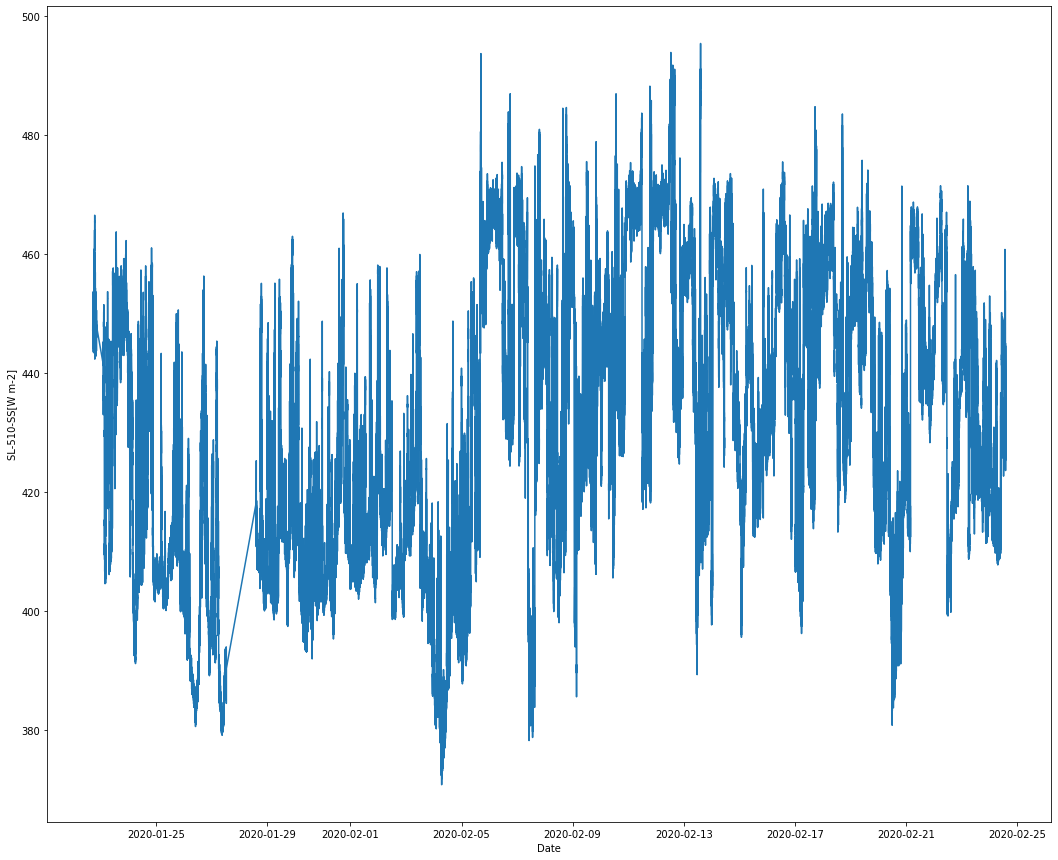

In [31]:
fig,ax = plt.subplots(1,1, figsize=(18, 15))
ax.plot(baa['dt'], baa['SL-510-SS[W m-2]'])
ax.set_ylabel('SL-510-SS[W m-2]')
ax.set_xlabel('Date')